In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cas = pd.read_csv('./baze/manjse/Cas.csv')
cesta = pd.read_csv('./baze/manjse/Cesta.csv')
faktor_cest = pd.read_csv('./baze/manjse/FaktorCest.csv')
faktor_oseb = pd.read_csv('./baze/manjse/FaktorOseb.csv')
koordinate = pd.read_csv('./baze/manjse/Koordinate.csv')
kraj = pd.read_csv('./baze/manjse/Kraj.csv')
nesreca = pd.read_csv('./baze/manjse/Nesreca.csv')
osebe = pd.read_csv('./baze/manjse/Osebe.csv')
splosno = pd.read_csv('./baze/manjse/Splosno.csv')

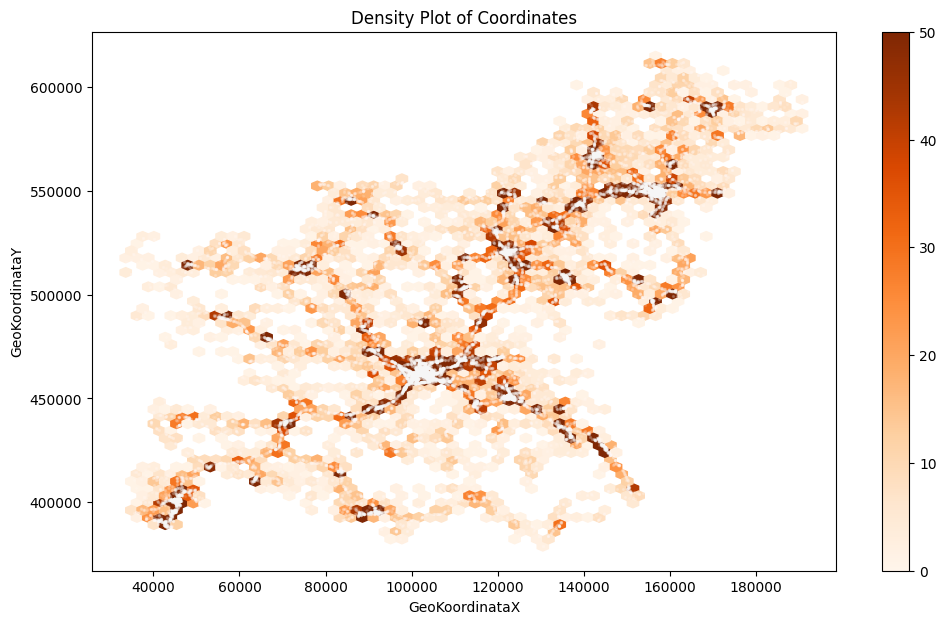

In [379]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

img = plt.imread('Slovenija.png')

colors = ['#FF8533', '#FFB34D', '#FFCE5C']
cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors, N=256)

fig, ax = plt.subplots(figsize=(12, 7))
# add scatter plot to display on top of the image
ax.scatter(x=koordinate['GeoKoordinataX'], y=koordinate['GeoKoordinataY'], s=2, alpha=0.1, color='white', zorder=3)
# add hexbin plot
hb = ax.hexbin(x=koordinate['GeoKoordinataX'], y=koordinate['GeoKoordinataY'], gridsize=60, cmap='Oranges', mincnt=1, vmin=0, vmax=50)
#ax.imshow(img, aspect='auto', alpha=0.5, zorder=0)

ax.set_title('Density Plot of Coordinates')
ax.set_xlabel('GeoKoordinataX')
ax.set_ylabel('GeoKoordinataY')
plt.colorbar(hb)

plt.show()


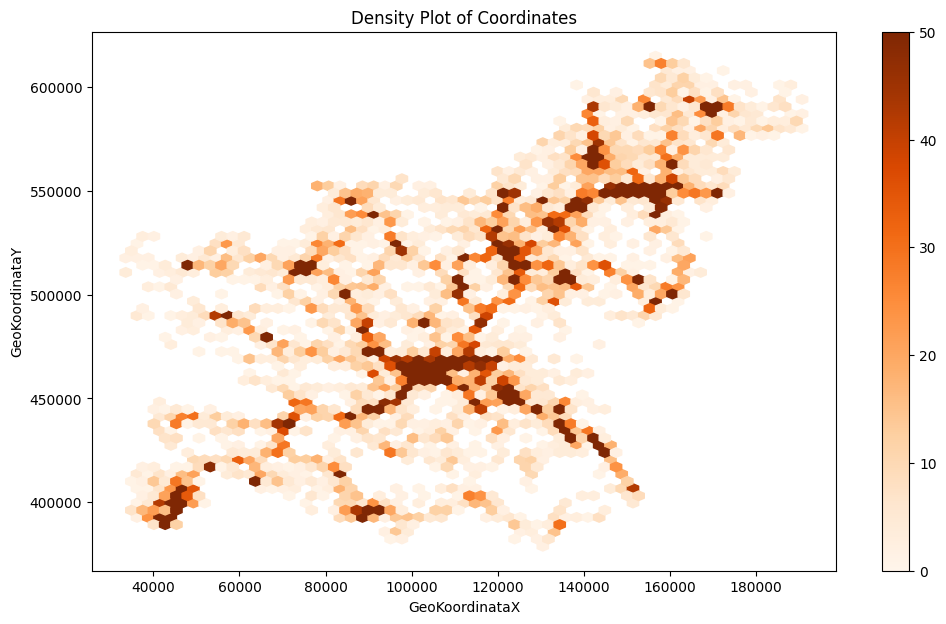

In [380]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 7))
hb = ax.hexbin(x=koordinate['GeoKoordinataX'], y=koordinate['GeoKoordinataY'], gridsize=60, cmap='Oranges', mincnt=1, vmin=0, vmax=50, zorder=2)
ax.set_aspect('equal')

ax.set_title('Density Plot of Coordinates')
ax.set_xlabel('GeoKoordinataX')
ax.set_ylabel('GeoKoordinataY')
plt.colorbar(hb)

plt.show()

C:\Users\Nina\AppData\Local\Temp\ipykernel_21020\2075759432.py:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vreme_df.loc[:, 'VremenskeOkoliscine'] = vreme_df['VremenskeOkoliscine'].map(vrste_vremen_id)


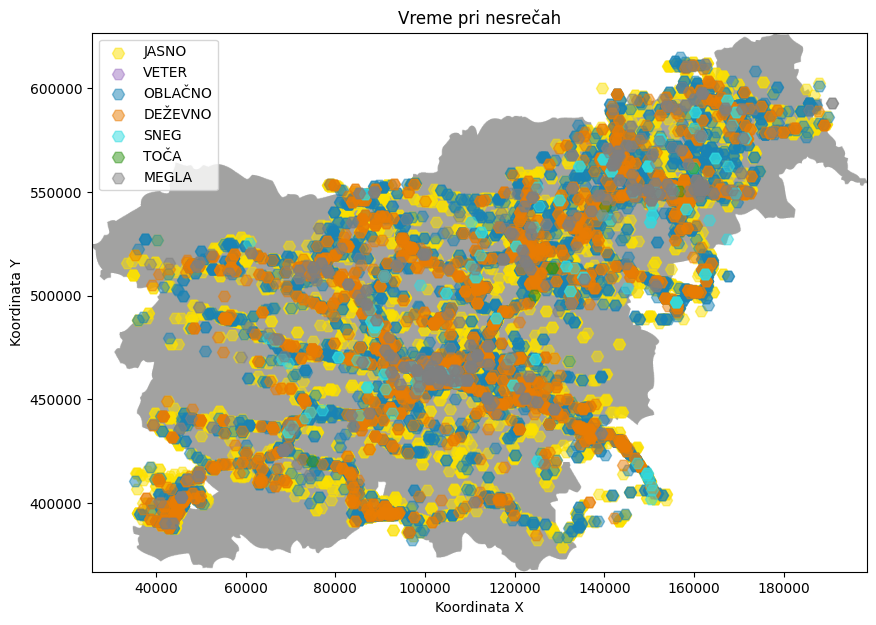

In [381]:
vreme = faktor_cest.drop(faktor_cest[(faktor_cest["VremenskeOkoliscine"] == "NEZNANO")].index)
vrste_vremen = vreme["VremenskeOkoliscine"].unique()
# print(vrste_vremen)

merged_df = pd.merge(vreme, koordinate, on="ZaporednaStevilkaOsebeVPN")
vreme_df = merged_df[['GeoKoordinataX', 'GeoKoordinataY', 'VremenskeOkoliscine']]
# print(vreme_df)

vreme_df = vreme_df.dropna().copy()

vrste_vremen_id = {'JASNO': 0,
                   'VETER': 1,
                   'OBLAČNO': 2,
                   'DEŽEVNO': 3,
                   'SNEG': 4,
                   'TOČA': 5,
                   'MEGLA': 6}

vreme_df.loc[:, 'VremenskeOkoliscine'] = vreme_df['VremenskeOkoliscine'].map(vrste_vremen_id)

colors = ["#fce100","#9f74c3", "#1983b5", "#e97c03", "#2fdce1",  "#319418", "grey"]

import matplotlib.image as mpimg
from skimage.transform import resize

slovenia_img = mpimg.imread('Slovenija.png')
nove_mere= (672,960)
slovenia_r= resize(slovenia_img, nove_mere)
extent = ax.get_xlim() + ax.get_ylim()

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_aspect('equal')

ax.imshow(slovenia_img,zorder=0, extent=extent,aspect='auto')

for i, vreme_id in enumerate(sorted(vreme_df['VremenskeOkoliscine'].unique())):
    subset = vreme_df[vreme_df['VremenskeOkoliscine'] == vreme_id]
    alpha = 0.5
    
    ax.scatter(subset['GeoKoordinataX'], subset['GeoKoordinataY'], s=75, alpha=alpha, c=colors[i], marker='H',
               label=[i for i in vrste_vremen_id if vrste_vremen_id[i]==vreme_id][0])

ax.set_title('Vreme pri nesrečah')
ax.set_xlabel('Koordinata X')
ax.set_ylabel('Koordinata Y')
ax.legend()
plt.show()

(25728.6998271834, 198545.3001728166, 366950.6, 626735.4)


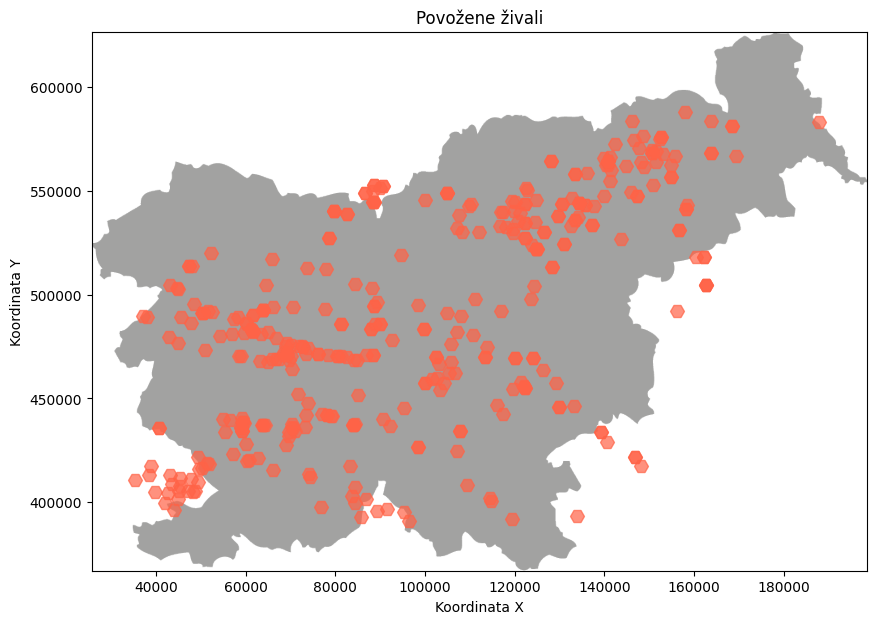

In [382]:
import matplotlib.image as mpimg
from skimage.transform import resize

nesreca = nesreca.drop(nesreca[(nesreca["TipNesrece"] != "POVOŽENJE ŽIVALI")].index)
slovenia_img = mpimg.imread('Slovenija.png')
nove_mere= (672,960)
slovenia_r= resize(slovenia_img, nove_mere)

merged_df = pd.merge(nesreca, koordinate, on="ZaporednaStevilkaOsebeVPN")
nesreca_df = merged_df[['GeoKoordinataX', 'GeoKoordinataY', 'TipNesrece']]


extent = ax.get_xlim() + ax.get_ylim()#dobis ext za sliko
print(extent)

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_aspect('equal')
ax.imshow(slovenia_img,zorder=0, extent=extent,aspect='auto')

ax.scatter(nesreca_df['GeoKoordinataX'], nesreca_df['GeoKoordinataY'], s=100, alpha=0.7, c="tomato", marker='H') # type: ignore


ax.set_title('Povožene živali')
ax.set_xlabel('Koordinata X')
ax.set_ylabel('Koordinata Y')

plt.show()